## Exploratory Data Analysis

In [124]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy 
import pickle
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

"""Change to the data folder"""
train_path = "./new_train/new_train"
val_path = './new_val_in/new_val_in'
# number of sequences in each dataset
# train:205942  val:3200 test: 36272 
# sequences sampled at 10HZ rate

### Create a dataset class 

In [80]:
class ArgoverseDataset(Dataset):
    
    """Dataset class for Argoverse"""
    def __init__(self, data_path: str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.data_path = data_path
        self.transform = transform
        self.pkl_list = glob(os.path.join(self.data_path, '*'))
        self.pkl_list.sort()
        
    def __len__(self): #len(val_dataset)
        return len(self.pkl_list)
    
    def __getitem__(self, idx): #val_dataset[0]
        pkl_path = self.pkl_list[idx]
        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)
        if self.transform:
            data = self.transform(data)
        return data

### Train/validation test dataset loading

In [82]:
train_dataset = ArgoverseDataset(data_path=train_path) 
val_dataset  = ArgoverseDataset(data_path=val_path) 

### EDA

In [83]:
len(train_dataset), len(val_dataset)

(205942, 3200)

GG, too many scenes, lets just take the first 5 scenens

In [54]:
df = []
for i, val in enumerate(val_dataset):
    df.append(val)
    if i >= 5:
        break
df = pd.DataFrame(df)

In [57]:
df.columns

Index(['city', 'lane', 'lane_norm', 'scene_idx', 'agent_id', 'car_mask',
       'p_in', 'v_in', 'p_out', 'v_out', 'track_id'],
      dtype='object')

In [63]:
def shape_viz(x):
    try:
        return x.shape
    except:
        return 'scalar'
df.applymap(shape_viz)    

,city,lane,lane_norm,scene_idx,agent_id,car_mask,p_in,v_in,p_out,v_out,track_id
0,scalar,"(72, 3)","(72, 3)",scalar,scalar,"(60, 1)","(60, 19, 2)","(60, 19, 2)","(60, 30, 2)","(60, 30, 2)","(60, 30, 1)"
1,scalar,"(261, 3)","(261, 3)",scalar,scalar,"(60, 1)","(60, 19, 2)","(60, 19, 2)","(60, 30, 2)","(60, 30, 2)","(60, 30, 1)"
2,scalar,"(288, 3)","(288, 3)",scalar,scalar,"(60, 1)","(60, 19, 2)","(60, 19, 2)","(60, 30, 2)","(60, 30, 2)","(60, 30, 1)"
3,scalar,"(378, 3)","(378, 3)",scalar,scalar,"(60, 1)","(60, 19, 2)","(60, 19, 2)","(60, 30, 2)","(60, 30, 2)","(60, 30, 1)"
4,scalar,"(306, 3)","(306, 3)",scalar,scalar,"(60, 1)","(60, 19, 2)","(60, 19, 2)","(60, 30, 2)","(60, 30, 2)","(60, 30, 1)"
5,scalar,"(585, 3)","(585, 3)",scalar,scalar,"(60, 1)","(60, 19, 2)","(60, 19, 2)","(60, 30, 2)","(60, 30, 2)","(60, 30, 1)"


In [66]:
df.head(2)

,city,lane,lane_norm,scene_idx,agent_id,car_mask,p_in,v_in,p_out,v_out,track_id
0,PIT,"[[3278.8716, 1968.7596, 0.0], [3282.6606, 1972...","[[3.7926118, 3.4899662, 0.0], [3.7891939, 3.49...",0,00000000-0000-0000-0000-000000000062,"[[1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0....","[[[3277.29638671875, 1947.6260986328125], [327...","[[[-0.0002748711849562824, -0.0002382324310019...","[[[3277.29638671875, 1947.625732421875], [3277...","[[[0.00022307495237328112, -0.0007175673381425...","[[[00000000-0000-0000-0000-000000000000], [000..."
1,MIA,"[[825.8388, 2049.997, 0.0], [825.92194, 2047.9...","[[0.08315584, -2.0102918, 0.0], [0.08315584, -...",1,00000000-0000-0000-0000-000000056485,"[[1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1....","[[[823.799560546875, 2068.298828125], [823.800...","[[[0.0008385988767258823, 0.14282366633415222]...","[[[823.811279296875, 2068.350341796875], [823....","[[[-0.011649041436612606, 0.41563326120376587]...","[[[00000000-0000-0000-0000-000000000000], [000..."


In [79]:
#df.car_mask[0] #make sense as we have 60 vehicles
df.p_in[0][0][:4]

array([[3277.29638672, 1947.62609863],
       [3277.29614258, 1947.62597656],
       [3277.29614258, 1947.62585449],
       [3277.29614258, 1947.62597656]])

Data Cleaning steps we will do according to the data description: https://www.kaggle.com/c/cse151b-spring/discussion/233734

- lane and lane norm: For some reason, the z-coordinate is included, but is always 0, so you can ignore it and just look at the x,y.

- We do not need to predict v_in and v_out for the final project?

- If we used track id/agent id, we can just extract the last 8 char of the string

- 


Important: is there any way we can filter the car mask to only include presenting cars in each scene?

#### Qb.i what is the distribution of input positions for all agents (hint: use histogram)


In [126]:
input_distribution = []
iterator = tqdm(enumerate(train_dataset), total=int(len(train_dataset)))
for i, val in iterator:
    masked_p_in = val['p_in'][val['car_mask'].reshape(-1) == 1]
    masked_p_in = masked_p_in.reshape(masked_p_in.shape[0] * masked_p_in.shape[1], 2)
    for p in masked_p_in:
        input_distribution.append(p)

In [127]:
input_distribution = np.array(input_distribution)

In [128]:
input_distribution.shape

(34431249, 2)

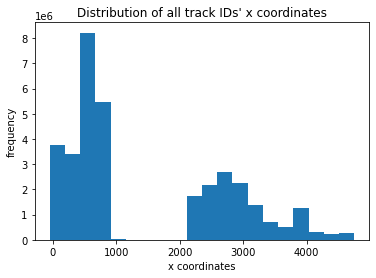

In [134]:
# x location
plt.hist(input_distribution[:, 0], bins=20)
plt.xlabel('x coordinates')
plt.ylabel('frequency')
plt.title('Distribution of all track IDs\' x coordinates')
plt.show()

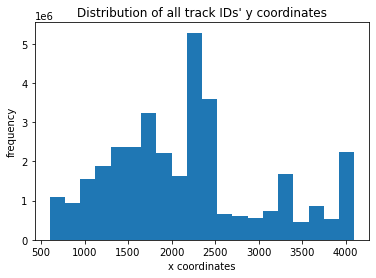

In [135]:
# y location
plt.hist(input_distribution[:, 1], bins=20)
plt.xlabel('x coordinates')
plt.ylabel('frequency')
plt.title('Distribution of all track IDs\' y coordinates')
plt.show()

### Create a loader to enable batch processing

In [71]:
batch_sz = 4
def my_collate(batch):
    """ collate lists of samples into batches, create [ batch_sz x agent_sz x seq_len x feature] """
    inp = [numpy.dstack([scene['p_in'], scene['v_in']]) for scene in batch]
    out = [numpy.dstack([scene['p_out'], scene['v_out']]) for scene in batch]
    inp = torch.LongTensor(inp)
    out = torch.LongTensor(out)
    return [inp, out]
val_loader = DataLoader(val_dataset,batch_size=batch_sz, shuffle = False, collate_fn=my_collate, num_workers=0)

### Visualize the batch of sequences

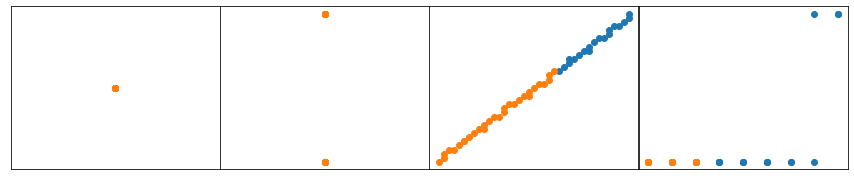

In [5]:
import matplotlib.pyplot as plt
import random

agent_id = 0

def show_sample_batch(sample_batch, agent_id):
    """visualize the trajectory for a batch of samples with a randon agent"""
    inp, out = sample_batch
    batch_sz = inp.size(0)
    agent_sz = inp.size(1)
    
    fig, axs = plt.subplots(1,batch_sz, figsize=(15, 3), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()   
    for i in range(batch_sz):
        axs[i].xaxis.set_ticks([])
        axs[i].yaxis.set_ticks([])
        
        # first two feature dimensions are (x,y) positions
        axs[i].scatter(inp[i, agent_id,:,0], inp[i, agent_id,:,1])
        axs[i].scatter(out[i, agent_id,:,0], out[i, agent_id,:,1])

        
for i_batch, sample_batch in enumerate(val_loader):
    inp, out = sample_batch
    """TODO:
      Deep learning model
      training routine
    """
    show_sample_batch(sample_batch, agent_id)
    break

In [19]:
#first batch
inp[0].shape

torch.Size([60, 19, 4])

In [20]:
inp[0, 0, :, 0]

tensor([3277, 3277, 3277, 3277, 3277, 3277, 3277, 3277, 3277, 3277, 3277, 3277,
        3277, 3277, 3277, 3277, 3277, 3277, 3277])

In [21]:
inp[0, 0, :, 1]

tensor([1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947,
        1947, 1947, 1947, 1947, 1947, 1947, 1947])